In [73]:
import pandas as pd
df = pd.read_csv("loan_predication.csv")
df

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [31]:
df.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [36]:
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [106]:
df.shape[0]

614

In [113]:
df.duplicated().sum()

np.int64(0)

In [32]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [45]:
df['Loan_Status'].value_counts()


Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [46]:
df['Gender'].value_counts()


Gender
Male      502
Female    112
Name: count, dtype: int64

In [47]:
df['Married'].value_counts()


Married
Yes    401
No     213
Name: count, dtype: int64

In [111]:
(df['Credit_History'].value_counts(normalize=True)*100)

Credit_History
1.0    84.219858
0.0    15.780142
Name: proportion, dtype: float64

In [48]:
df['Property_Area'].value_counts()


Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [75]:
df['LoanAmount'].mean()

np.float64(146.41216216216216)

In [76]:
df['ApplicantIncome'].mean()

np.float64(5403.459283387622)

In [77]:
pd.crosstab(df['Education'],df['Loan_Status'])

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82

In [89]:
df.groupby('Property_Area')['LoanAmount'].mean()

Property_Area
Rural        152.260116
Semiurban    145.504386
Urban        142.198953
Name: LoanAmount, dtype: float64

In [92]:
df.corr(numeric_only=True)

ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   
Credit_History           -0.014715          -0.002056   -0.008433   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.045306       -0.014715  
CoapplicantIncome         -0.059878       -0.002056  
LoanAmount                 0.039447       -0.008433  
Loan_Amount_Term           1.000000        0.001470  
Credit_History             0.001470        1.000000

In [93]:
df.groupby('Gender')['LoanAmount'].mean()

Gender
Female    126.697248
Male      149.265957
Name: LoanAmount, dtype: float64

In [97]:
df['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [98]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

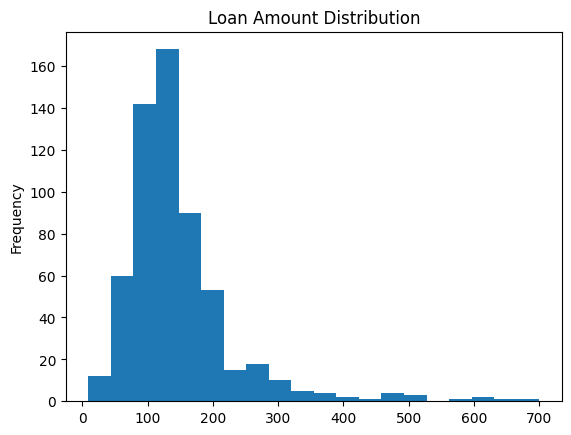

In [99]:
import matplotlib.pyplot as plt
df['LoanAmount'].plot(kind='hist', bins=20)
plt.title("Loan Amount Distribution")
plt.show()

In [102]:
pd.pivot_table(df, index='Property_Area', columns='Loan_Status', aggfunc='size', fill_value=0)


Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133

Text(0.5, 1.0, 'Self-Employed vs Loan Status')

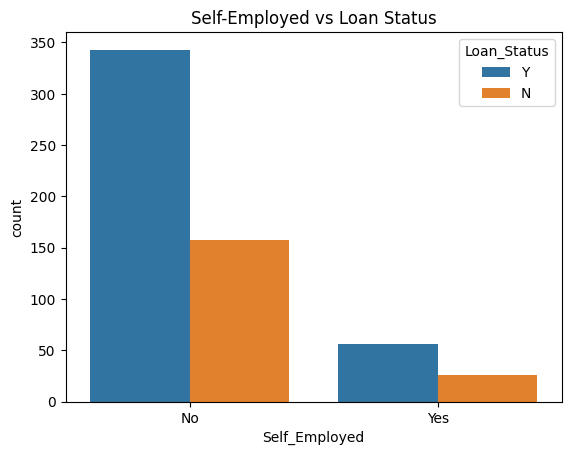

In [115]:
import seaborn as sns
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df)
plt.title("Self-Employed vs Loan Status")

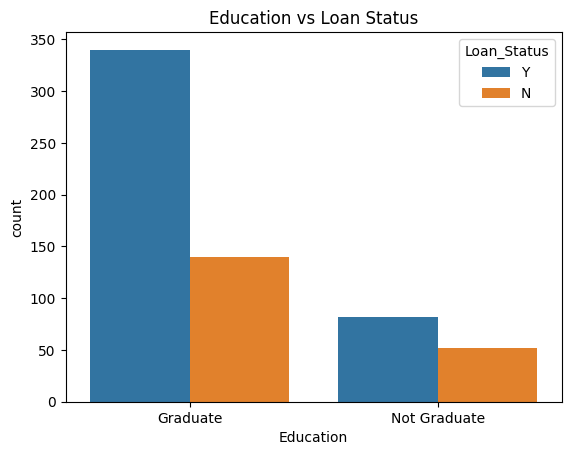

In [118]:
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title("Education vs Loan Status")
plt.show()


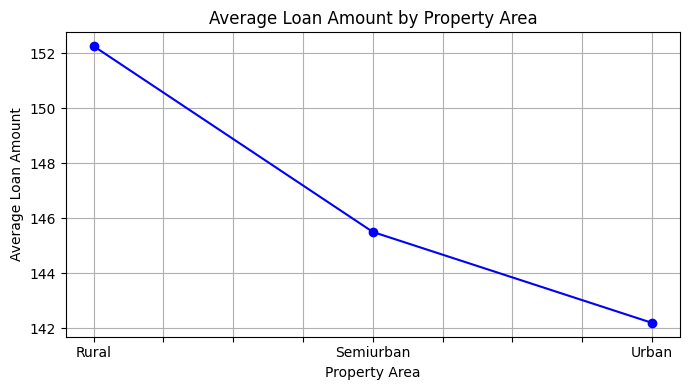

In [120]:
avg_loan = df.groupby('Property_Area')['LoanAmount'].mean()
plt.figure(figsize=(7, 4))
avg_loan.plot(kind='line', marker='o', color='blue')
plt.title("Average Loan Amount by Property Area")
plt.xlabel("Property Area")
plt.ylabel("Average Loan Amount")
plt.grid(True)
plt.tight_layout()
plt.show()